In [76]:
# Libraries for Data Handling
import numpy as np
import pandas as pd
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
df = pd.read_csv('king_ country_ houses_aa.csv')

In [4]:
# DATA CLEANING
df['date_format'] = pd.to_datetime(df['date'], format ='%Y%m%dT%H%M%S') # convert to date format  
df.insert(0, 'date_format', df.pop('date_format')) # locate date column in the front


# Drop columns
df.drop(columns=['id'],inplace=True)
df.drop(columns=['date'],inplace=True)

# Set it as index
df.set_index('date_format', inplace=True)

In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape

(21613, 19)

In [8]:
col_to_drop = ['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'sqft_lot15', 'lat', 'long']
df = df.drop(columns=col_to_drop)

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15'],
      dtype='object')

In [10]:
# Dealing with outliers
def outliers_dealing(df): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in df.select_dtypes(include=[np.number]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [11]:
outliers_dealing(df)

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15
date_format,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,1180,0,1955,98178,1340
2014-12-09,538000.0,3,2.25,2570,2170,400,1951,98125,1690
2015-02-25,180000.0,2,1.00,770,770,0,1933,98028,2720
2014-12-09,604000.0,4,3.00,1960,1050,910,1965,98136,1360
2015-02-18,510000.0,3,2.00,1680,1680,0,1987,98074,1800
...,...,...,...,...,...,...,...,...,...
2014-05-21,360000.0,3,2.50,1530,1530,0,2009,98103,1530
2015-02-23,400000.0,4,2.50,2310,2310,0,2014,98146,1830
2014-06-23,402101.0,2,0.75,1020,1020,0,2009,98144,1020


In [12]:
#X-y split
X = df.drop("price", axis=1)
y = df["price"]

#Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 21613.
80% for training data: 17290.
20% for test data: 4323.


In [14]:
# Train the model
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [15]:
#Model validation
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [16]:
#Metric
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.2864
RMSE =  328459.6611
MSE =   107885748944.269
MAE =  196635.347


In [17]:
# Add Feature Scaling

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Print the sizes to confirm the split
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 21613.
80% for training data: 17290.
20% for test data: 4323.


In [18]:
# Train the model with scaled data

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

# Print results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.4508
RMSE =  288136.1046
MSE =   83022414798.3652
MAE =  160087.5825


In [19]:
# Large improvement in model accuracy.

In [20]:
# Hyperparameter Tuning (# of Neighbors)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")

Best n_neighbors: 3


In [21]:
# Already using n = .

In [22]:
# KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6255
RMSE =  237940.746
MSE =   56615798629.2069
MAE =  129978.3026


In [23]:
# Found increase in accuracy.

In [24]:
# Hyperparameter Tuning (# of Neighbors)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

model = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")

Best n_neighbors: 7


In [55]:
# Run it with n = 7.

model = KNeighborsRegressor(n_neighbors=7)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6422
RMSE =  232585.376
MSE =   54095957117.4389
MAE =  125772.8991


In [62]:
# Hyperparameter Tuning (Weights)

param_grid = {'weights': ['uniform', 'distance']}

model = KNeighborsRegressor(n_neighbors=7)

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best weights: {grid_search.best_params_['weights']}")

Best weights: distance


In [70]:
model = KNeighborsRegressor(n_neighbors=7, weights='distance')

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6422
RMSE =  232585.376
MSE =   54095957117.4389
MAE =  125772.8991


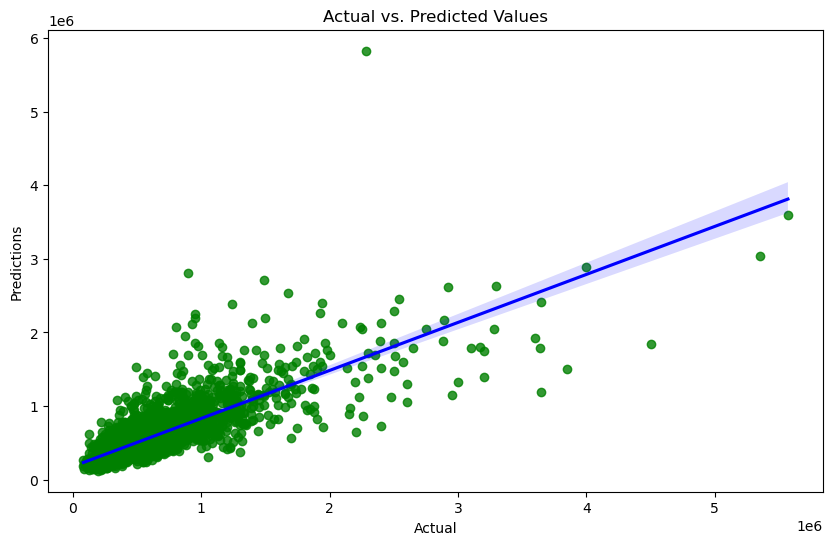

In [80]:
# Plot Actual vs. Predicted values

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.show()